In questo progetto analizzeremo lo sviluppo di Covid 19 a livello mondiale.
Fonte dei dati: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

La decisione dell'ECDC di interrompere la raccolta dei dati giornalieri si basa sul fatto che il numero giornaliero di casi è spesso soggetto a correzioni retroattive, a ritardi nella segnalazione e/o alla segnalazione di dati raggruppati per diversi giorni. Di conseguenza, le variazioni giornaliere del numero di casi non costituiscono una base valida per le decisioni politiche.

Ecco alcune domande che guidano la nostra analisi
* Quali paesi hanno il maggior numero di casi?
* Quali paesi hanno un alto tasso di mortalità?
* Il contenimento ha avuto un effetto sul numero di casi?
* Confrontare la situazione per continente

In [16]:
#Importare le le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_excel('/content/drive/MyDrive/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xls')

In [18]:
df.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [19]:
df.shape

(61900, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [21]:
#contare i valori mancanti
df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [22]:
#eliminare i valori mancanti
df.dropna(inplace = True)

Quali paesi hanno il maggior numero di casi?

In [23]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [24]:
df_by_country=df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases',ascending=False)
df_by_country

<ipython-input-24-0c571f6231ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_country=df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases',ascending=False)


,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
...,...,...
Montserrat,8,1
Falkland_Islands_(Malvinas),8,0
Anguilla,7,0


Quali paesi hanno un alto tasso di mortalità?

In [25]:
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']

In [26]:
df_by_country.head()

,cases,deaths,mortality_rate
countriesAndTerritories,,,
United_States_of_America,16256754,299177,0.018403
India,9884100,143355,0.014504
Brazil,6901952,181402,0.026283
Russia,2653928,46941,0.017687
France,2376852,57911,0.024365


Text(0.5, 1.0, 'Countries with highest mortality rates')

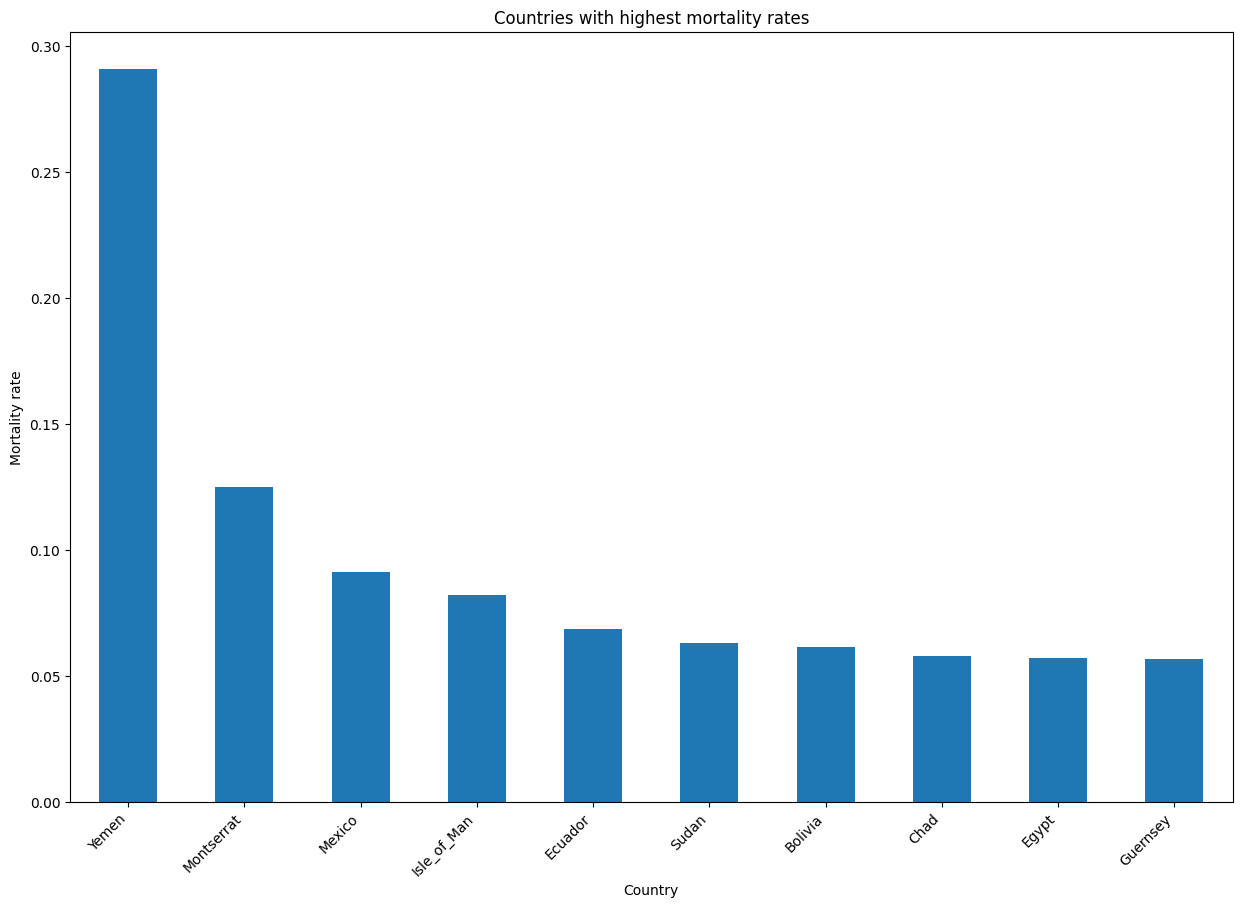

In [27]:
#visualizzare i primi 10 dati
plt.figure(figsize=(15,10))
ax = df_by_country['mortality_rate'].sort_values(ascending=False).head(10).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")

# Paesi con il maggior numero di morti

<ipython-input-29-089557292599>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Text(0, 0.5, 'Number of deaths')

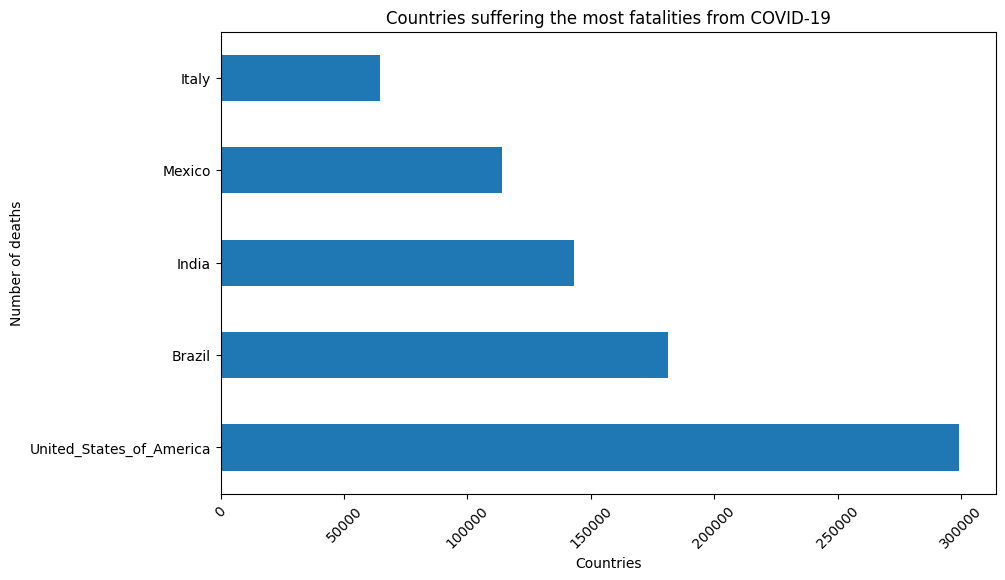

In [29]:
plt.figure(figsize=(10,6))
ax=df_by_country['deaths'].sort_values(ascending=False).head(5).plot(kind='barh')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Countries suffering the most fatalities from COVID-19")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of deaths")

# Effetto del confinamento sul numero di casi

In [30]:
df_by_month = df.groupby('month')['cases','deaths'].sum()

<ipython-input-30-1d058dc13a81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month = df.groupby('month')['cases','deaths'].sum()


In [32]:
df_by_month.head()

,cases,deaths
month,,
1,9767,212
2,74717,2702
3,714475,35668
4,2338739,189142
5,2891247,140118


Text(0, 0.5, 'Numero di morti')

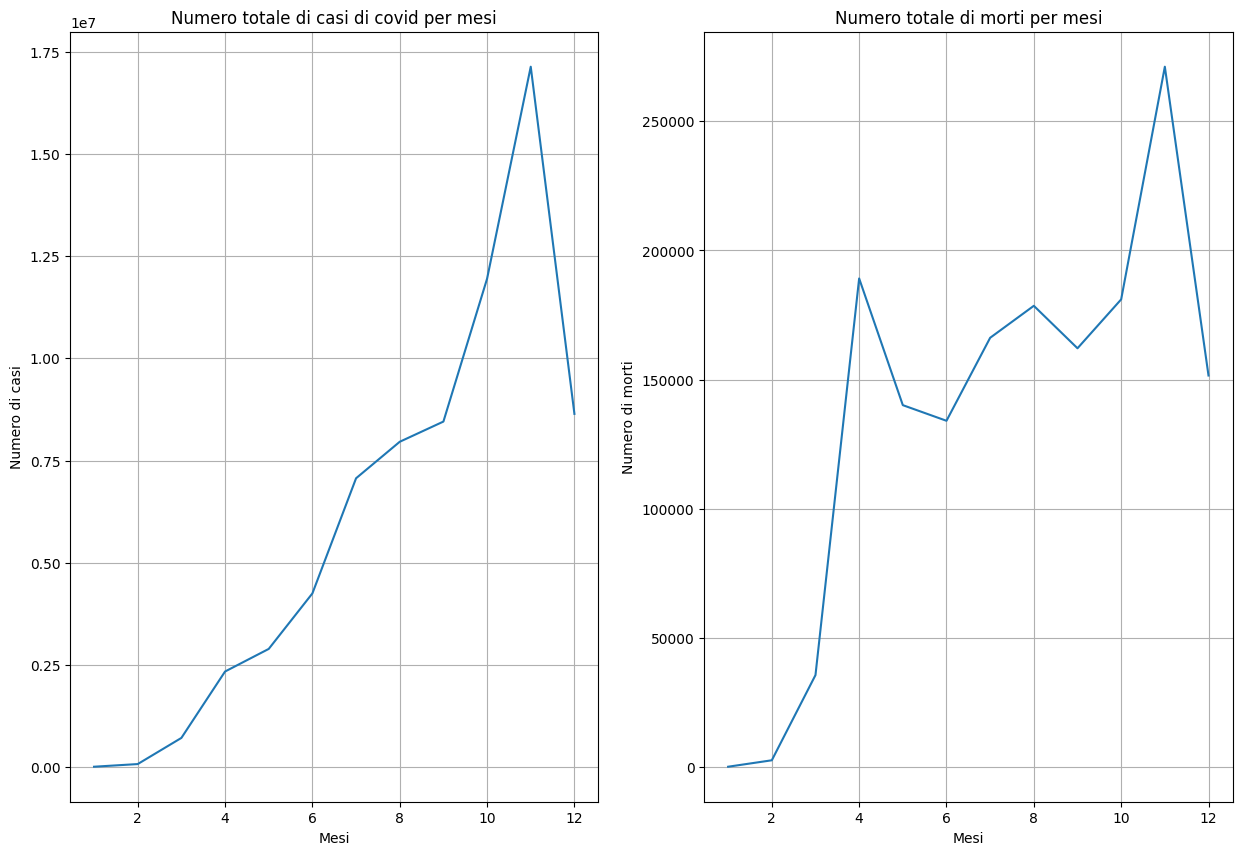

In [38]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line',ax=ax1).grid()
ax1.set_title("Numero totale di casi di covid per mesi")
ax1.set_xlabel("Mesi")
ax1.set_ylabel("Numero di casi")
df_by_month['deaths'].plot(kind='line',ax=ax2).grid()
ax2.set_title("Numero totale di morti per mesi")
ax2.set_xlabel("Mesi")
ax2.set_ylabel("Numero di morti")

Se si guarda al quadro generale, non si ha l'impressione che ci sia stata una riduzione. Analizziamo il caso di alcuni Paesi in particolare, che hanno un confinamento rigido.

In [39]:
#seleziono alcuni paesi e faccio un groupBy per mesi e resetto l'index per averlo corretto
df_germany = df[df.countriesAndTerritories == 'Germany']
df_germany_monthwise = df_germany.groupby('month')['cases','deaths'].sum()
df_germany_grouped = df_germany_monthwise.reset_index()


df_uk = df[df.countriesAndTerritories == 'United_Kingdom']
df_uk_monthwise = df_uk.groupby('month')['cases','deaths'].sum()
df_uk_grouped = df_uk_monthwise.reset_index()


df_france = df[df.countriesAndTerritories == 'France']
df_france_monthwise = df_france.groupby('month')['cases','deaths'].sum()
df_france_grouped = df_france_monthwise.reset_index()


df_italy = df[df.countriesAndTerritories == 'Italy']
df_italy_monthwise = df_italy.groupby('month')['cases','deaths'].sum()
df_italy_grouped = df_italy_monthwise.reset_index()

<ipython-input-39-0f0545b0f7e4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_germany_monthwise = df_germany.groupby('month')['cases','deaths'].sum()
<ipython-input-39-0f0545b0f7e4>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_uk_monthwise = df_uk.groupby('month')['cases','deaths'].sum()
<ipython-input-39-0f0545b0f7e4>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_france_monthwise = df_france.groupby('month')['cases','deaths'].sum()
<ipython-input-39-0f0545b0f7e4>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_italy_monthwise = df_italy.groupby('month')['cases','deaths'].sum()


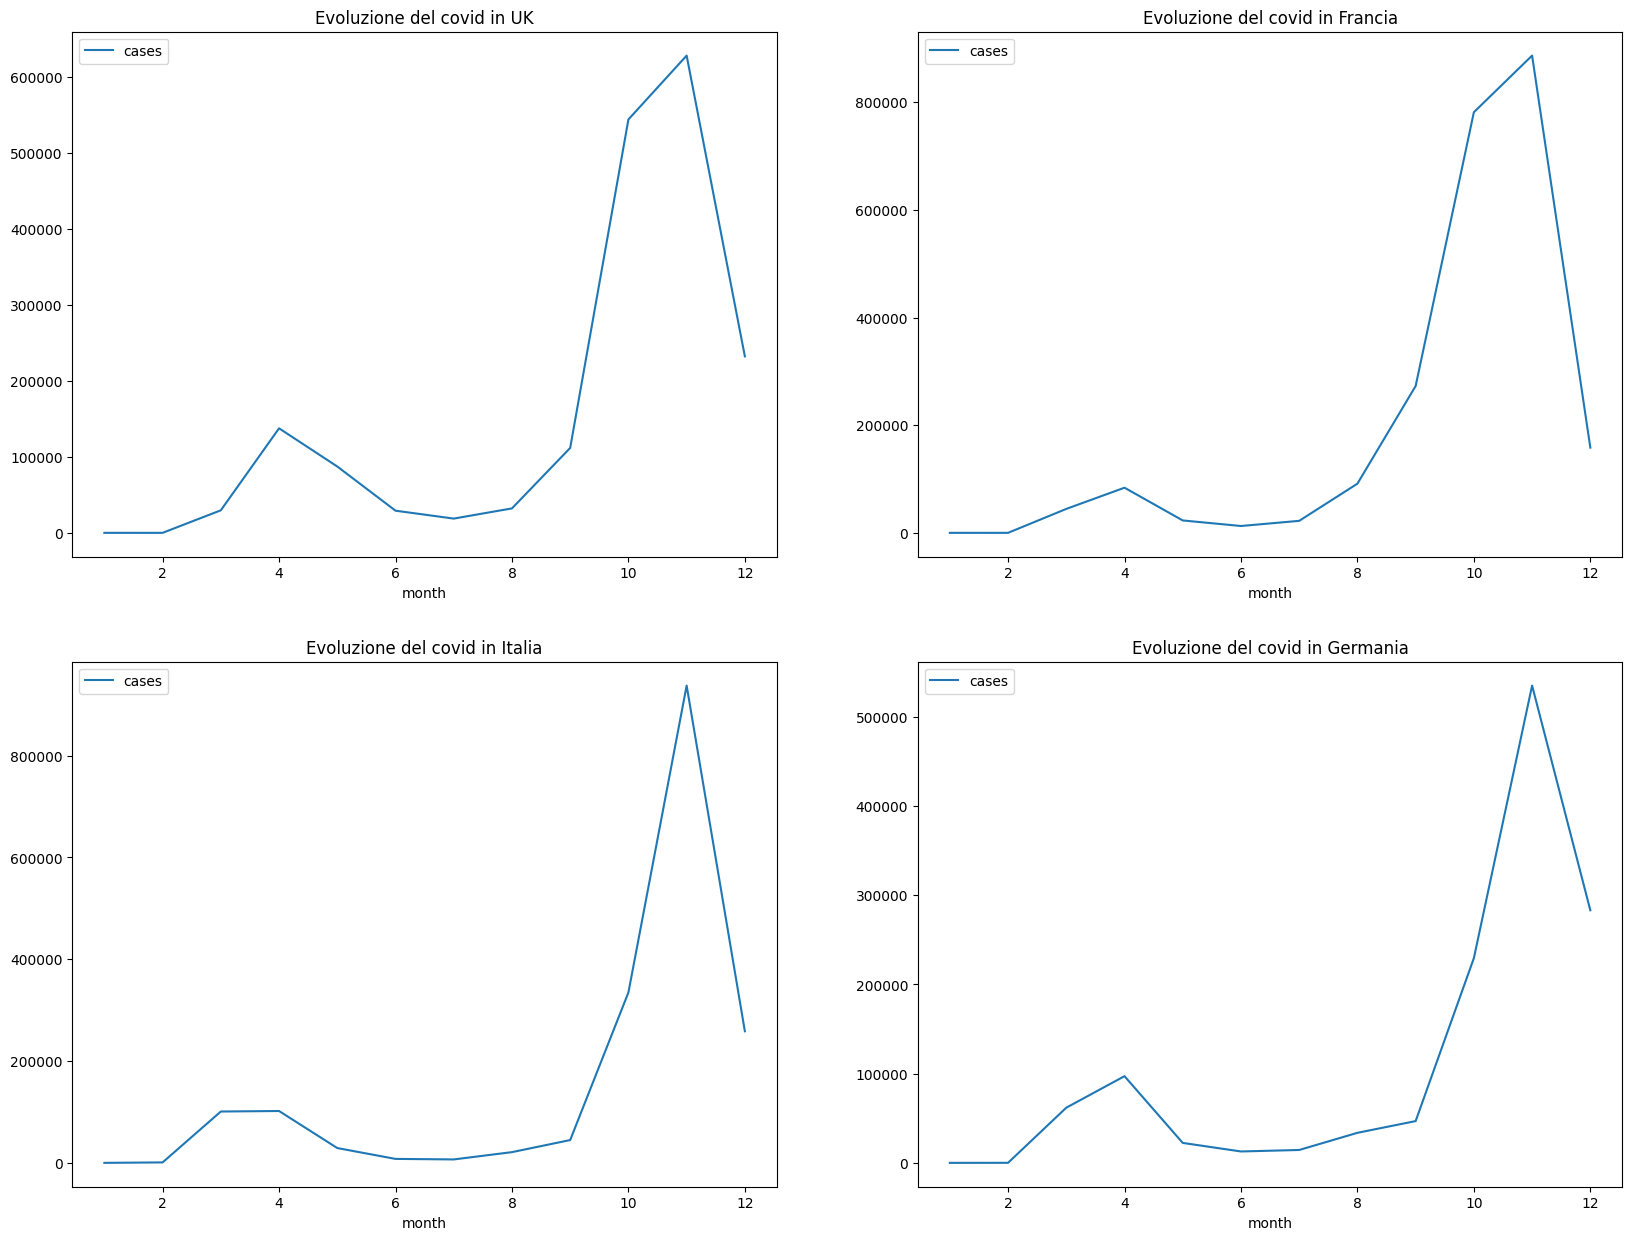

In [41]:
#viualizzo i dati relativi ai paesi selezionati
fig=plt.figure(figsize=(20,15))

ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1)
ax1.set_title("Evoluzione del covid in UK")

ax2=fig.add_subplot(2,2,2)
df_france_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Evoluzione del covid in Francia")

ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3)
ax3.set_title("Evoluzione del covid in Italia")

ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4)
ax4.set_title("Evoluzione del covid in Germania")
plt.show()

Confrontare la situazione per continente

In [42]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [44]:
df['continentExp'].value_counts()

Europe     16657
Africa     14004
America    13105
Asia       12695
Oceania     2298
Name: continentExp, dtype: int64

In [45]:
df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('cases')

<ipython-input-45-7026165bc6d9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('cases')


,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370


In [46]:
df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('deaths')

<ipython-input-46-3a4d9bfb461b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('deaths')


,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370
